
#### Autor: Iury Coelho
__propósito__: implementar funções utilizando a biblioteca librosa para que seja possível analisar recursos e características de sinais de audio
>__funções implementadas/propósito__:
*  audio_infor / extrair informações básicas de um sinal de áudio
*  harmonico_percursivo /  decompor um sinal de áudio de entrada em harmonico e percussivo
*  CENS / obter representação da energia espectral
*  MFCC / obter os coeficientes cepstrais de frequência de Mel (MFCCs)
*  centroid / calcular o centroide
*  contrast / calcular o contraste
*  zero_crossing / calcular a taxa de cruzamento de zero de uma série temporal de áudio
*  tonnetz / calcula o tonnetz
*  rolloff / calcular o rolloff
*  mel_spec / calcular o mel espectograma

In [312]:
%matplotlib inline  
import librosa
import librosa.display
import IPython
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [387]:
audio1="audio/ale-f1-l1.wav"
#audio2="audio/tri-f1-q1.wav"

#### Construção de funções para recursos de audio e extração de caracteristicas 

In [478]:
 def audio_infor(audio, nome, sentimento, genero):
    """ 
    Função para extrair informações básicas de audios: 
    duração do áudio, taxa de amostragem, amostras totais
        parâmetros
            audio: caminho do arquivo de audio ou url
            nome: nome do audio 
            sentimento: sentimento que o audio exprime
            genero: genero da voz do audio, masculino ou feminino
    
    """  
    y,sr=librosa.load(audio)
    print ('VISÃO GERAL DO AUDIO:'+nome)    
    print ('Genero da voz:'+ genero)
    print('Sentimento:'+ sentimento)
    secs=np.size(y)/sr
    print('Duração do áudio: '+str(secs)+' s')
    print('Taxa de amostragem de áudio: '+str(sr)+' samples/sec')
    print('Amostras Totais: '+str(np.size(y)))
    print('\n')
    return IPython.display.Audio(audio)

def harmonico_percursivo(audio,nome):
    """
    Função para  decompor um sinal de áudio de entrada em: 
    1.sinal que consiste em todos os sons harmônicos 
    2.sinal que consiste em todos os sons percussivos.
        parâmetros
            audio: caminho do arquivo de audio ou url 
            nome: nome do audio 
    """
    y,sr=librosa.load(audio)
    y_harm, y_percu = librosa.effects.hpss(y)   
    fig, ax = plt.subplots(nrows=2)
    librosa.display.waveplot(y_percu, sr=sr, color='g',ax=ax[0])
    librosa.display.waveplot(y_harm, sr=sr, ax=ax[1])
    ax[0].set( title= 'harmônicos(em azul) e percussivos(em verde) de: ' + nome)
    plt.figure(figsize=(10, 5))
    librosa.display.waveplot(y_percu, sr=sr, color='g', alpha=0.5, label='Sinal Percussivo')
    librosa.display.waveplot(y_harm, sr=sr, alpha=0.20, label='Sinal Harmonico')
    plt.title('Interposição entre os sinais harmonicos e percussivos de: ' + nome)
    plt.legend()

def CENS(audio, nome):
    """
    Função para obter uma representação de 12 elementos da energia espectral 
    em que os blocos representam as 12 classes de tons (do, #do, re, #re, mi, fa, #fa, so, #so, la, #la si)
        parâmetros
            audio: caminho do arquivo de audio ou url 
            nome: nome do audio
    """
    y,sr=librosa.load(audio)
    chroma=librosa.feature.chroma_cens(y, sr=sr)
    plt.figure(figsize=(12, 5))
    librosa.display.specshow(chroma,y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Calculate the Chroma Energy Normalized (CENS) de: ' + nome)
    
def MFCC(audio, nome):
    """
    Função para obter os coeficientes cepstrais de frequência de Mel (MFCCs)
        parâmetros
            audio: caminho do arquivo de audio ou url 
            nome: nome do audio
    """    
    y,sr=librosa.load(audio)
    mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=13)
    plt.figure(figsize=(13, 5))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC de:'+nome)
    
def centroid(audio, nome):
    """
    Função para calcular o Centroide
        parâmetros
            audio: caminho do arquivo de audio ou url 
            nome: nome do audio                       
    """
    y,sr=librosa.load(audio)
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    plt.figure(figsize=(10,5))
    plt.semilogy(centroid.T, label='Centróide Epectral')
    plt.xlabel('Time(s)')
    plt.ylabel('Centroid (Hz)')   
    plt.legend()
    plt.title('Centroide:'+nome)
    
def contrast(audio,nome):    
    """
    Função para calcular o Contraste
        parâmetros
            audio: caminho do arquivo de audio ou url 
            nome: nome do audio    
    """   
    y,sr=librosa.load(audio)
    contrast=librosa.feature.spectral_contrast(y,sr=sr)
    plt.figure(figsize=(15,5))
    librosa.display.specshow(contrast, x_axis='time')
    plt.colorbar()
    plt.ylabel('Bandas de frequência')
    plt.title('Contraste Spectral')

def zero_crossing(sinal):
    """
    Função que  Calcula a taxa de cruzamento de zero de uma série temporal de áudio. 
        parametro:
            sinal = sinal de entrada            
    """ 
    y,sr=librosa.load(audio)
    return librosa.core.zero_crossings(y=sinal)

def  tonnetz(sinal):
    """
    Função para calcular os recursos do centroide tonal    
        parametro:
            sinal= sinal de entrada           
    """
    y,sr=librosa.load(audio)
    return librosa.feature.tonnetz(y=sinal)

def rolloff(sinal): 
    """
    Função para calcular o rolloff
        parametro:
            sinal= sinal de entrada   
    """
    rolloff = librosa.feature.spectral_rolloff(y=sinal, sr=sr)
    plt.figure(figsize=(12,5))
    plt.ylabel('Hz')
    plt.semilogy(rolloff.T, label='Roll-off frequencia')

def mel_spec(sinal):
    
    """
    Função para calcular o mel espectograma
        parametro:
            sinal= sinal de entrada   
    """
    
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
    plt.figure(figsize=(13, 4))
    librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel espectrograma')
  

    

### Utilizando os recursos de extração de características de sinal de voz 

In [455]:
## extraindo informações básicas do audio1
audio_infor(audio1, "ale-f1-l1", "alegria", "feminino")

VISÃO GERAL DO AUDIO:ale-f1-l1
Genero da voz:feminino
Sentimento:alegria
Duração do áudio: 2.4516099773242632 s
Taxa de amostragem de áudio: 22050 samples/sec
Amostras Totais: 54058




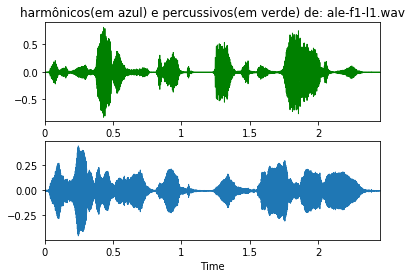

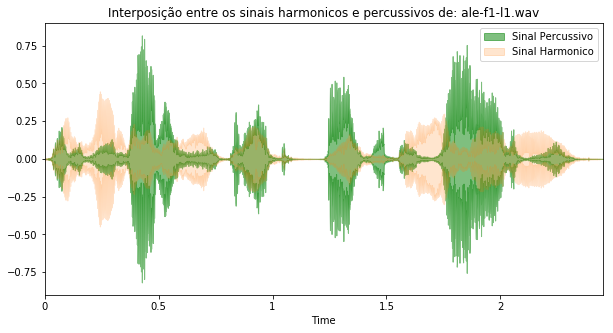

In [460]:
#separando o audio1 em sinais harmonicos e percursivos
harmonico_percursivo(audio1,"ale-f1-l1.wav")

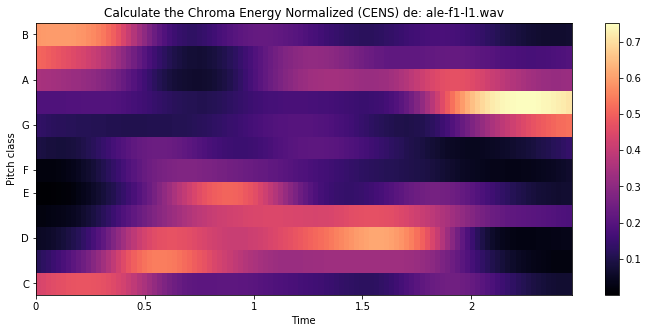

In [461]:
#capturando o Chroma Energy Normalized (CENS) do audio1
CENS(audio1, "ale-f1-l1.wav")

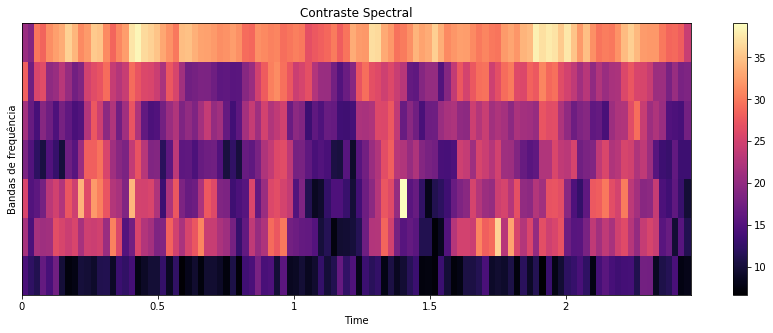

In [462]:
#Obtendo o contraste do audio1
contrast(audio1, "ale-f1-l1.wav")

In [463]:
#calculando o zero crossing do audio1
zero_crossing(y)


array([ True, False, False, ..., False, False, False])

In [458]:
#calculando o tonnetz do y_harmonico
tonnetz(y_harm)

array([[ 1.05613365e-01,  5.49235283e-02, -1.25731198e-03,
        -5.38812806e-02, -2.23102213e-02,  1.89476300e-02,
         1.09347949e-01,  2.25948542e-01,  1.96173209e-01,
         1.05530699e-01,  7.66744184e-02,  1.02035989e-01,
         1.33581172e-01,  1.05613890e-01,  8.84511022e-02,
         2.67754523e-02, -6.04904995e-02, -1.35961664e-01,
        -8.25135307e-02,  1.54579519e-01,  1.40009907e-01,
        -6.15268009e-03, -3.21031540e-02, -2.18046583e-02,
        -4.33586856e-02,  5.71482731e-03,  5.79514271e-02,
         1.21918301e-01,  1.26741102e-01,  8.69293379e-02,
         1.86750592e-02, -2.99969069e-02, -3.48954259e-02,
         1.61208535e-02,  3.85219661e-02,  1.10579234e-01,
         2.14712753e-01,  3.29828332e-01,  4.04419150e-01,
         4.17202670e-01,  2.97637533e-01,  1.57948328e-01,
         6.09670342e-02,  1.70165556e-02,  2.78754624e-02,
         7.34785100e-02,  1.35620014e-02,  7.88325244e-03,
        -1.42157609e-02, -1.71395239e-02, -9.13967968e-0

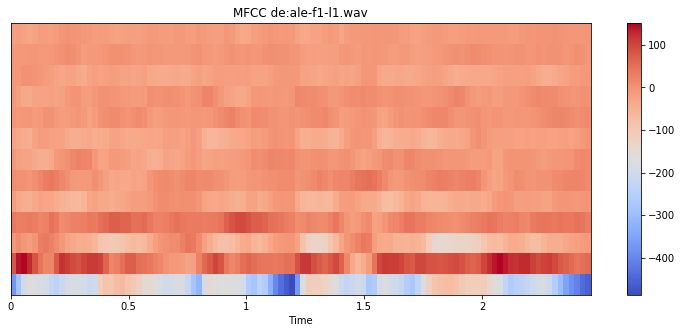

In [464]:
#obtendo os MFCC's
MFCC(audio1, "ale-f1-l1.wav")

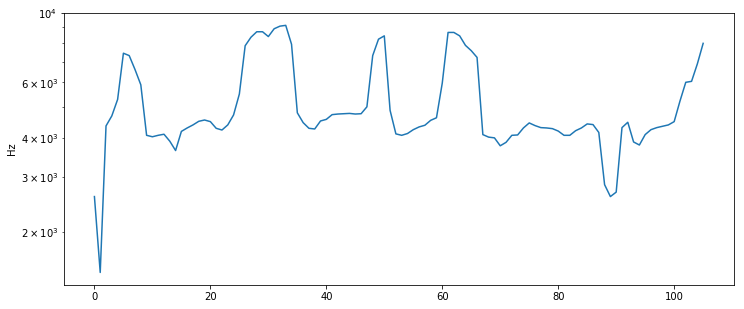

In [467]:
#exbindo gráfico de rollof do sinal y_harmonico
rolloff(y_percu)

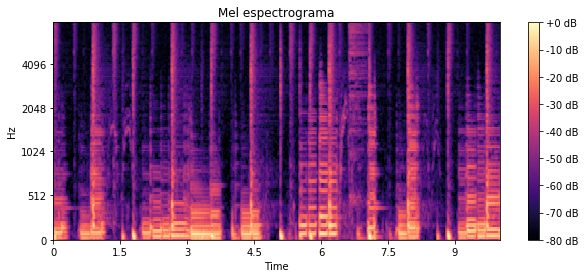

In [483]:
#Exibindo o mel espectograma de y_percu
mel_spec(y_percu)